# LSST CCOB ghost : misaligned optic tests

Study effect of misaligments on ghost images

## TODO
- move functions to library
- separate batoid module from analysis 


In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import batoid
import matplotlib.pyplot as plt
import ghosts.plotter as plotter

In [6]:
from ghosts.constants import *
print(f'LSST Camera has {LSST_CAMERA_PIXEL_DENSITY_MM2:.0f} pixels per mm^2')

LSST Camera has 36000 pixels per mm^2


In [7]:
from ghosts.beam import get_n_phot_for_power_nw_wl_nm

wl = 500  # nm
p = 100   # nW 
print(f'Number of photon for {p} nW at {wl} nm is {get_n_phot_for_power_nw_wl_nm(p, wl):e}')

Number of photon for 100 nW at 500 nm is 2.517058e+11


In [8]:
# CCOB like geometry, i.e. lenses + filters
telescope = batoid.Optic.fromYaml("LSST_CCOB_r.yaml")

In [12]:
from ghosts.tweak_optics import *
# test list of optics
assert get_list_of_optics(telescope)==['L1', 'L2', 'Filter', 'L3', 'Detector'], 'Not a CCOB optical setup'

# Make refractive interfaces partially reflective

# Call on current telescope
make_optics_reflective(telescope)


0.02

Direct path is number 28
  central impact point is (0.000012, -0.000014)
  transmission is 0.8337

Maximum expected flux is 0.8337
Maximum bin content is 843.5798


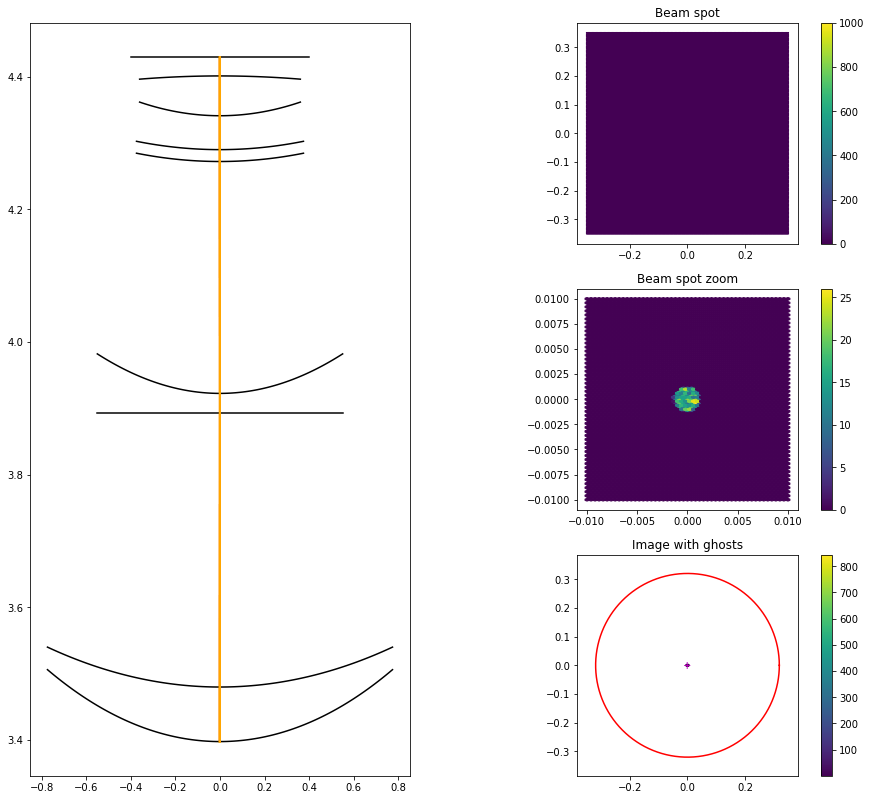

In [13]:
from ghosts.beam_configs import BEAM_CONFIG_0
from ghosts.simulator import run_simulation
from ghosts.plotter import plot_setup

# Run simulation with standard beam config
traceFull, rForward, rReverse, rays = run_simulation(telescope, beam_config=BEAM_CONFIG_0)
simulation = [traceFull, rForward, rReverse, rays]
# Check setup
plot_setup(telescope, simulation)


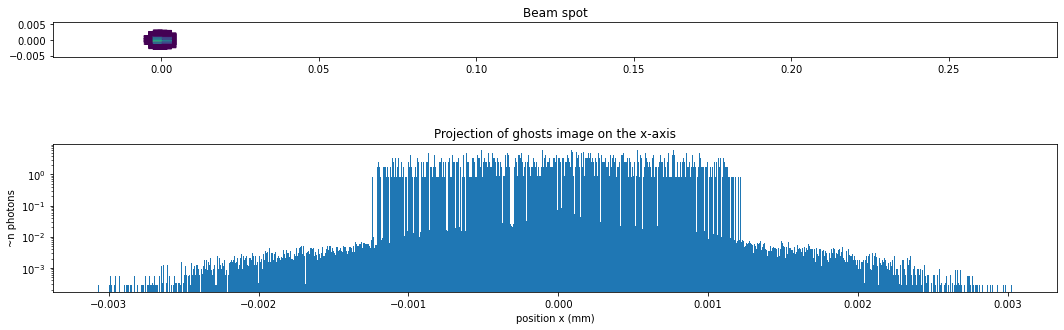

In [14]:
# Zoom on ghosts
from ghosts.plotter import plot_zoom_on_ghosts
plot_zoom_on_ghosts(rForward)

Ghosts map for 100 nW beam at 500 nm with a diameter of 2.5 mm


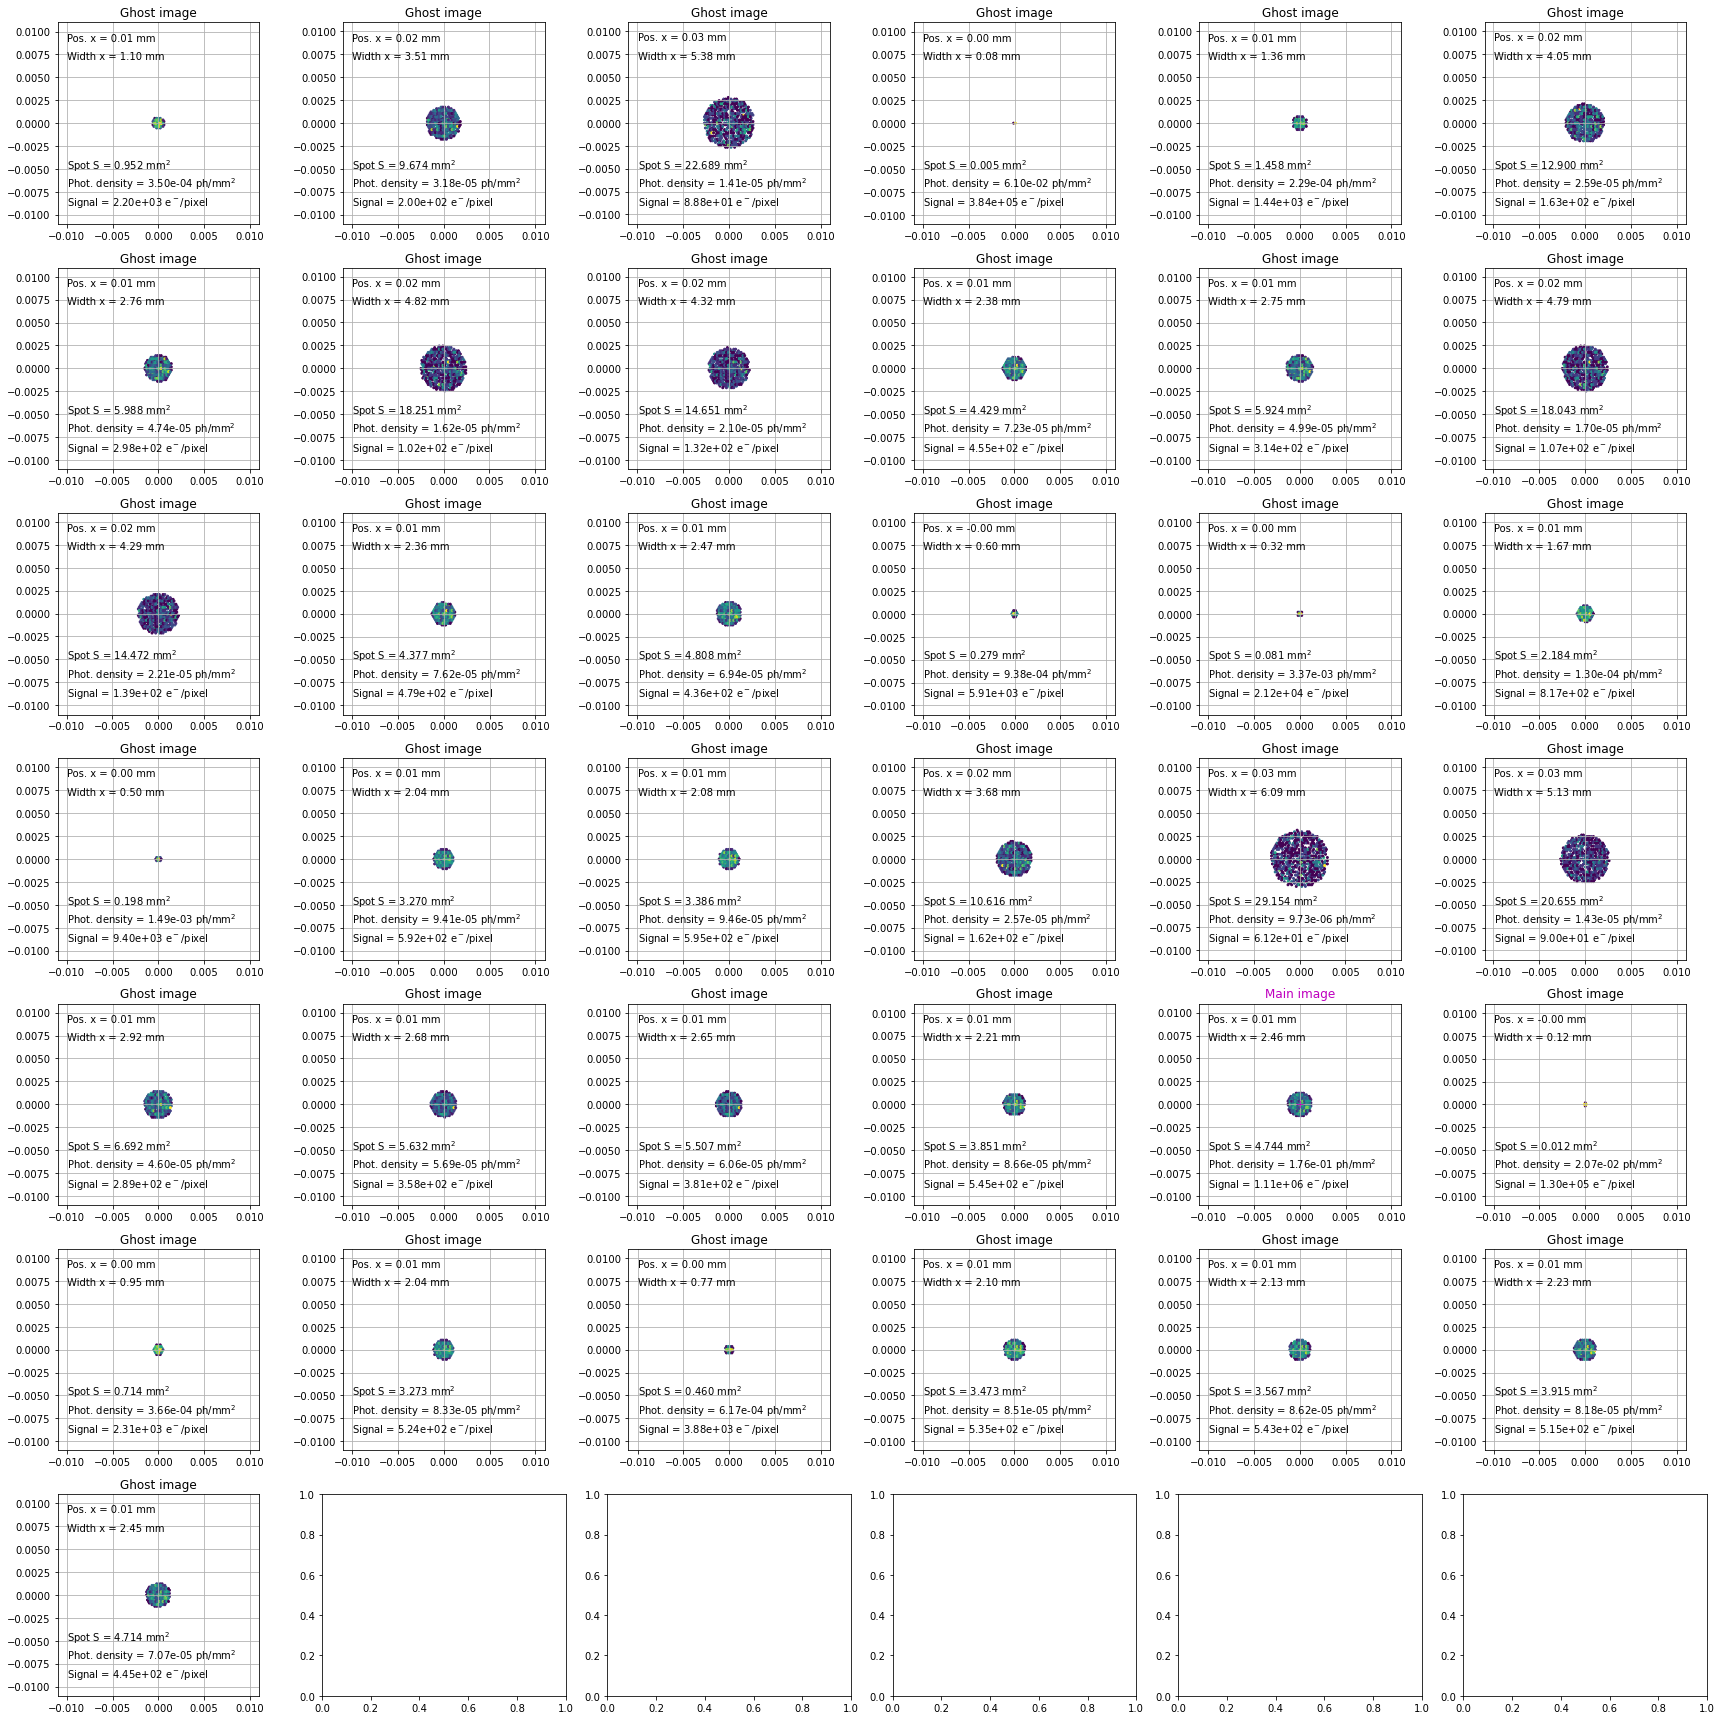

In [17]:
from ghosts.plotter import plot_ghosts_map
# make figure and fill with plots
plt.rcParams["figure.figsize"] = [24, 24]
spots_data = plot_ghosts_map(rForward)

In [18]:
from ghosts.analysis import make_data_frame
data_frame_1 = make_data_frame(rForward, spots_data)
data_frame_1.sort_values(by=['name'])

,config,n_photons,beam_x,beam_y,beam_theta,beam_phi,index,name,pos_x,width_x,surface,pixel_signal
33,0,1000,0.1,0.0,0.0,0.0,33,"(Detector, Filter_entrance)",1.054620e-05,0.002103,3.473276,5.352358e+02
34,0,1000,0.1,0.0,0.0,0.0,34,"(Detector, Filter_exit)",1.068823e-05,0.002132,3.567460,5.425917e+02
29,0,1000,0.1,0.0,0.0,0.0,29,"(Detector, L1_entrance)",-6.239597e-07,0.000124,0.012158,1.300852e+05
30,0,1000,0.1,0.0,0.0,0.0,30,"(Detector, L1_exit)",4.782177e-06,0.000954,0.714165,2.305909e+03
31,0,1000,0.1,0.0,0.0,0.0,31,"(Detector, L2_entrance)",1.023738e-05,0.002042,3.272843,5.239182e+02
32,0,1000,0.1,0.0,0.0,0.0,32,"(Detector, L2_exit)",3.838177e-06,0.000766,0.460042,3.880962e+03
35,0,1000,0.1,0.0,0.0,0.0,35,"(Detector, L3_entrance)",1.119720e-05,0.002233,3.915312,5.147706e+02
36,0,1000,0.1,0.0,0.0,0.0,36,"(Detector, L3_exit)",1.228646e-05,0.002451,4.714128,4.451707e+02
10,0,1000,0.1,0.0,0.0,0.0,10,"(Filter_entrance, L1_entrance)",1.377340e-05,0.002747,5.924199,3.138013e+02
11,0,1000,0.1,0.0,0.0,0.0,11,"(Filter_entrance, L1_exit)",2.403723e-05,0.004794,18.043321,1.072793e+02


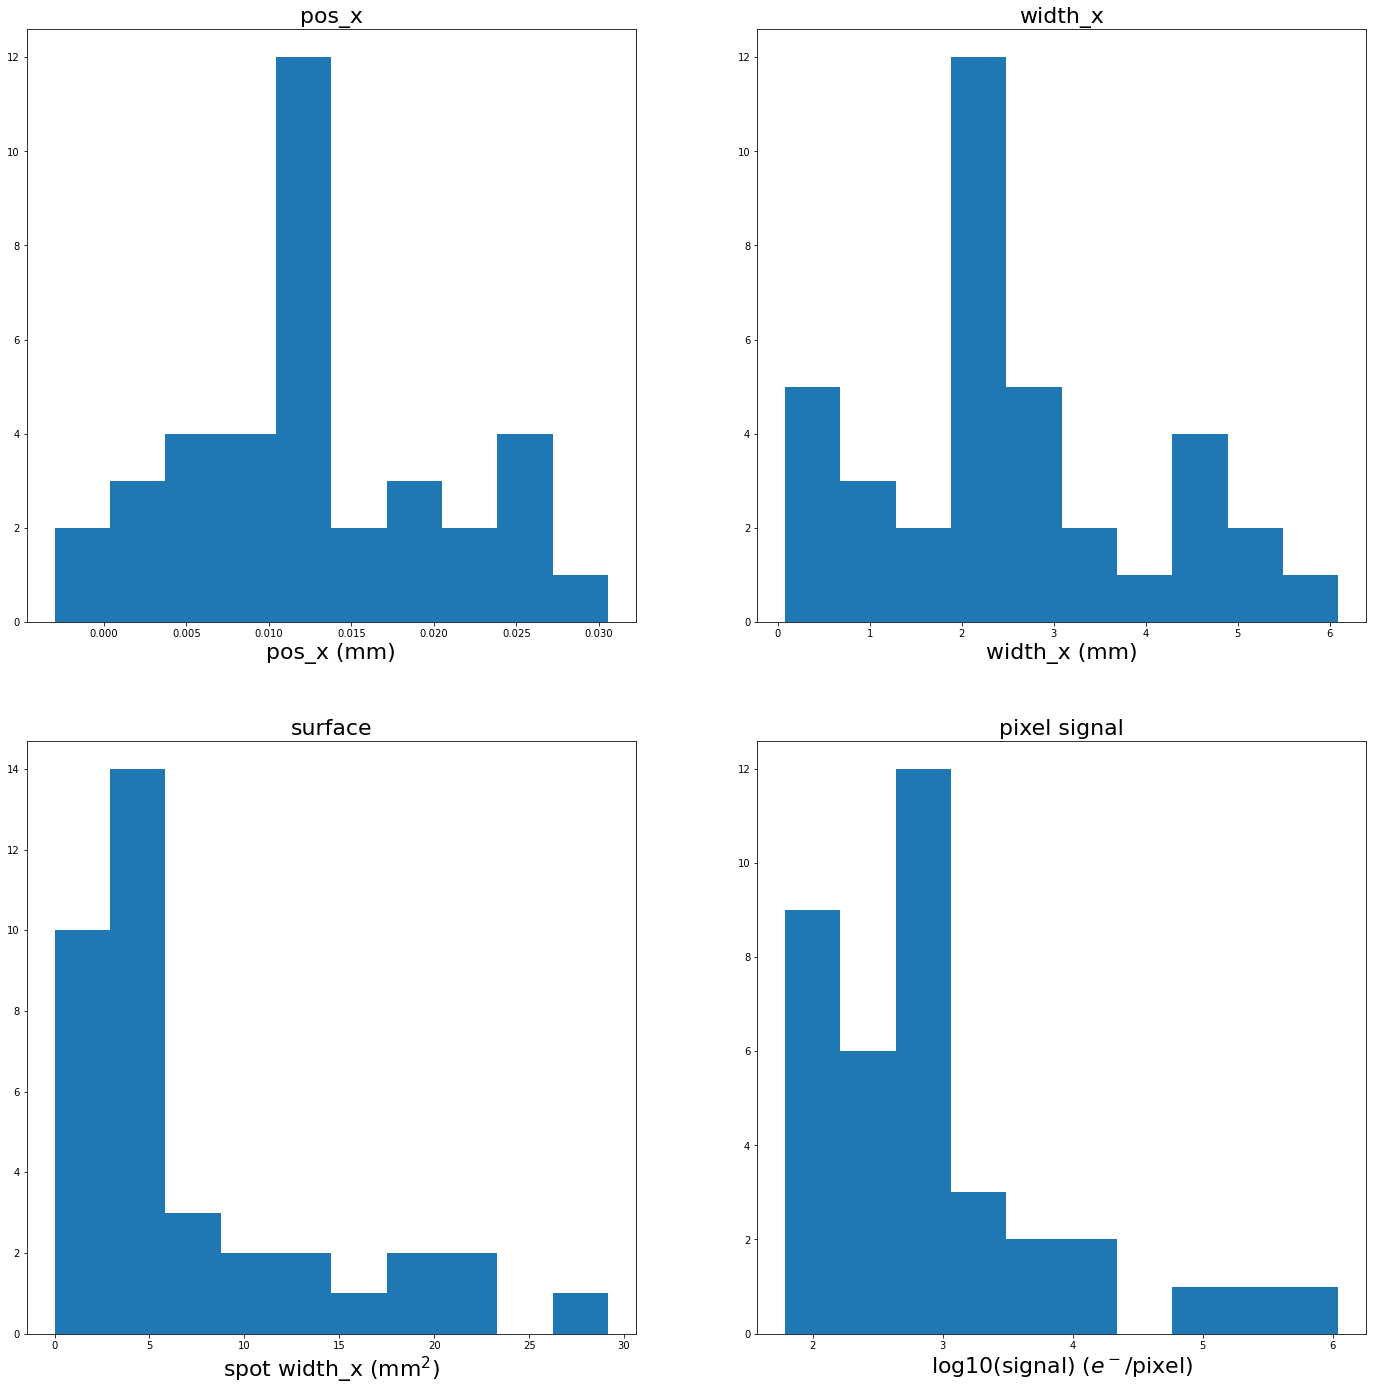

In [23]:
# Looking at overal spots stats
plotter.plot_spots_stats(data_frame_1)
plt.show()

In [20]:
from ghosts.analysis import compute_ghost_separations
#  compute ghost separations
ghost_separations = compute_ghost_separations(data_frame_1)
ghost_separations[100:105]

,ghost_1,ghost_2,name_1,name_2,distance,overlap,surface_ratio,signal_ratio
100,2,34,"(L2_exit, L1_exit)","(Detector, Filter_exit)",0.000016,-0.003738,0.157232,6.108157
101,2,35,"(L2_exit, L1_exit)","(Detector, L3_entrance)",0.000016,-0.003789,0.172564,5.794965
102,3,4,"(L2_entrance, L1_entrance)","(L2_entrance, L1_exit)",0.000006,-0.000716,277.839010,0.003748
103,3,5,"(L2_entrance, L1_entrance)","(L2_exit, L2_entrance)",0.000020,-0.002048,2457.646498,0.000424
104,3,6,"(L2_entrance, L1_entrance)","(Filter_exit, L1_entrance)",0.000013,-0.001408,1140.793166,0.000777


630 ghost spots pairs are in overlap out of 630


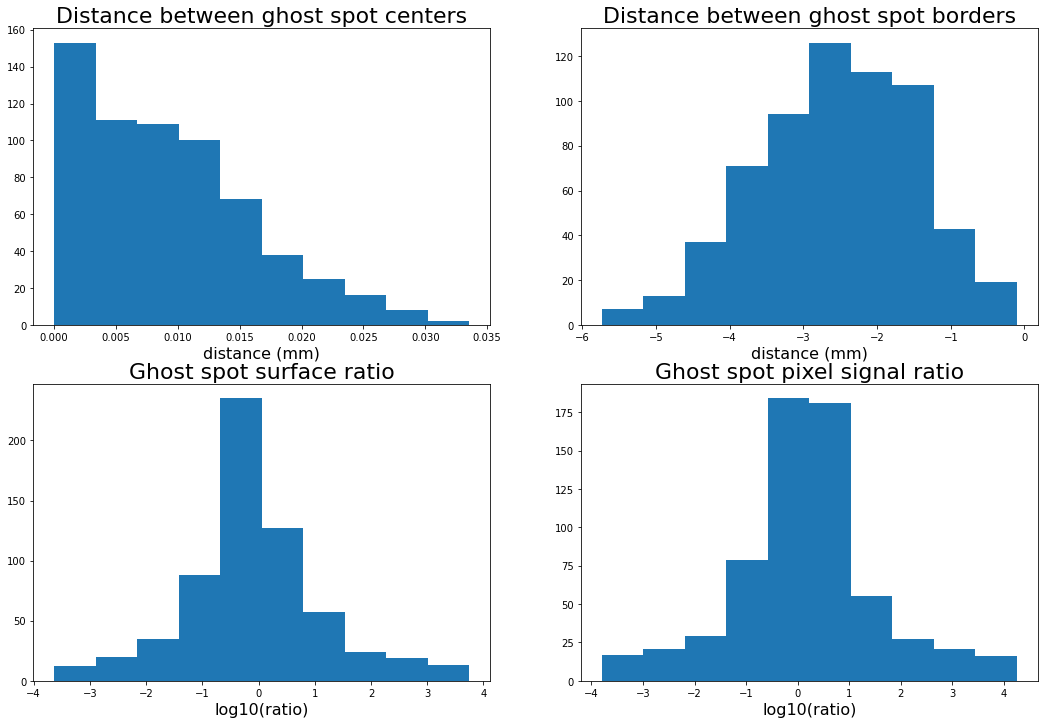

In [22]:
plotter.plot_ghosts_spots_distances(ghost_separations)
plt.show()


# Now rotating optics: L2

In [ ]:
# Rotating L2 around Y
rotated_telescope = rotate_optic(telescope, 'L2', axis='y', angle=1, verbose=True)
make_optics_reflective(rotated_telescope)
# showing telescope
plt.rcParams["figure.figsize"] = [6, 12]
fig, ax = plt.subplots(1)
# after rotation
rotated_telescope.draw2d(ax, c='orange')
# before rotation
telescope.draw2d(ax, c='k')
plt.show()

In [ ]:
# Run simulation with standard beam config
traceFull_r, rForward_r, rReverse_r, rays_r = run_simulation(rotated_telescope, beam_config=BEAM_CONFIG_0)
simulation_r = [traceFull_r, rForward_r, rReverse_r, rays_r]
# Check setup
plot_setup(rotated_telescope, simulation_r)


In [ ]:
# Zoom on ghosts
plot_zoom_on_ghosts(rForward)
plot_zoom_on_ghosts(rForward_r)

In [ ]:
# make figure and fill with plots
plt.rcParams["figure.figsize"] = [24, 24]
spots_data_r = plot_ghosts_map(rForward_r)

In [ ]:
data_frame_r = make_data_frame(rForward_r, spots_data_r)
plot_spots_stats(data_frame_r)
plt.show()


In [ ]:
ghost_separations_r = compute_ghost_separations(data_frame_r)
plot_ghosts_spots_distances(ghost_separations_r)
plt.show()


In [ ]:
ghost_separations[:10].sort_values(by=['name_1', 'name_2'])



In [ ]:
ghost_separations_r[:10].sort_values(by=['name_1', 'name_2'])


In [ ]:
name_1=('L1_exit', 'L1_entrance')
name_2=('Filter_entrance', 'L1_entrance')
ghost_separations_r[(ghost_separations_r['name_1']==name_1) & (ghost_separations_r['name_2']==name_2)]


# Now inspecting spots data to know by how these moved for the L2 rotation


In [ ]:
data_frame_1.head()


In [ ]:
data_frame_r.head()

In [ ]:
x_diff = pd.merge(data_frame_1, data_frame_r, how='left', on='name')
x_diff.head()

# Rotating L2 by 0.1°

In [ ]:
# Rotating L2 around Y
rotated_L2 = rotate_optic(telescope, 'L2', axis='y', angle=0.1)
make_optics_reflective(rotated_L2)
traceFull_L2, rForward_L2, rReverse_L2, rays_L2 = run_simulation(rotated_L2, beam_config=BEAM_CONFIG_0)
plot_zoom_on_ghosts(rForward)
plot_zoom_on_ghosts(rForward_L2)
plt.rcParams["figure.figsize"] = [24, 24]
spots_data_L2 = plot_ghosts_map(rForward_L2)
data_frame_L2 = make_data_frame(rForward_L2, spots_data_L2)
ghost_separations_L2 = compute_ghost_separations(data_frame_L2)
plt.show()


In [ ]:
# by how much beam spots moved?
x_diff_L2 = pd.merge(data_frame_1, data_frame_L2, how='left', on='name')
plt.rcParams["figure.figsize"] = [9, 6]
plt.hist((x_diff_L2['pos_x_x']-x_diff_L2['pos_x_y'])*1000)
plt.xlabel('Ghost spot displacement (mm)')
plt.show()
print(f'L2 rotation of 0.1° means a displacement of {300*math.tan(0.1*3.14/180.):.3f} mm of the lens border.')

In [ ]:
# Rotate and simulate
def full_rotation(telescope, optic_name='L2', angle=0.1, debug=False):
    rotated_optic = rotate_optic(telescope, optic_name, axis='y', angle=angle)
    if debug:
        print(f'{optic_name} rotation of {angle:.3f}° means a displacement of {300*math.tan(angle*3.14/180.):.3f} mm of the lens border.')
    make_optics_reflective(rotated_optic)
    traceFull_o, rForward_o, rReverse_o, rays_o = run_simulation(rotated_optic, beam_config=BEAM_CONFIG_0)
    spots_data_o, _spots = reduce_ghosts(rForward_o)
    data_frame_o = make_data_frame(rForward_o, spots_data_o)
    ghost_separations_o = compute_ghost_separations(data_frame_o)
    return data_frame_o, ghost_separations_o

# Rotating L2 specifically
def full_rotation_L2(telescope, angle=0.1):
    return full_rotation(telescope, optic_name='L2', angle=angle)

# Helpers to run and plot a scan in one optical element rotation
def sim_scan_rotated_optic(telescope, optic_name, min_angle, max_angle, step_angle, ref_data_frame=data_frame_1):
    ''' @TODO handle better reference data frame
    '''
    print(f'Starting {optic_name} rotation scan.')
    rotation_sims = list()
    scan_angles = list()
    for angle in np.arange(min_angle, max_angle, step_angle):
        scan_angles.append(angle)
        print(f'{angle:.3f}', end = ' ')
        df, _= full_rotation(telescope, optic_name=optic_name, angle=angle)
        rotation_sims.append(df)

    # Merge data frames
    merged_data_frame = [pd.merge(ref_data_frame, df, how='left', on='name') for df in rotation_sims]
    print('Done.')
    return merged_data_frame, scan_angles


# Translate and simulate
def full_translation(telescope, optic_name='L2', distance=0.01, debug=False):
    translated_optic = translate_optic(telescope, optic_name, axis='x', distance=distance)
    make_optics_reflective(translated_optic)
    traceFull_s, rForward_s, rReverse_s, rays_s = run_simulation(translated_optic, beam_config=BEAM_CONFIG_0)
    spots_data_s, _spots = reduce_ghosts(rForward_s)
    data_frame_s = make_data_frame(rForward_s, spots_data_s)
    ghost_separations_s = compute_ghost_separations(data_frame_s)
    return data_frame_s, ghost_separations_s

# Helpers to run and plot a scan in one optical element translation
def sim_scan_translated_optic(telescope, optic_name, min_dist, max_dist, step_dist, ref_data_frame=data_frame_1):
    ''' @TODO handle better reference data frame
    '''
    print(f'Starting {optic_name} translation scan.')
    sims = list()
    scan_values = list()
    for shift in np.arange(min_dist, max_dist, step_dist):
        scan_values.append(shift)
        print(f'{shift:.6f}', end = ' ')
        df, _= full_translation(telescope, optic_name=optic_name, distance=shift)
        sims.append(df)

    # Merge data frames
    merged_data_frame = [pd.merge(ref_data_frame, df, how='left', on='name') for df in sims]
    print('Done.')
    return merged_data_frame, scan_values


def plot_max_displacement_for_sim_scan(merged_data_frame, scan_angles, trans_type='rotation'):
    # Plot maximum displacement as a function of filter rotation angle
    # Get list of signed maximum displacements in mm
    x_max_diff = list()
    for df in merged_data_frame:
        tmp_diff = df['pos_x_x']-df['pos_x_y']
        max_abs = max(abs(tmp_diff))
        if max_abs == tmp_diff.max():
            x_max_diff.append(max_abs*1000)
        else:
            x_max_diff.append(-max_abs*1000)

    # Linear fit
    lin_fit = stats.linregress(scan_angles, x_max_diff)
    print(f'Filter fit results: intercept = {lin_fit.intercept:.6f}, slope = {lin_fit.slope:.3f}')

    # Scatter plot with fit
    plt.rcParams["figure.figsize"] = [18, 6]
    fig, ax = plt.subplots(1, 2)    
    ax[0].plot(scan_angles, x_max_diff, 'o', label='data')
    interp_ys = [lin_fit.intercept + lin_fit.slope*x for x in scan_angles]
    ax[0].plot(scan_angles, interp_ys, 'r', label='linear fit')
    ax[0].legend()
    ax[0].set_title(f'Maximum ghost displacement as a function of element {trans_type}')
    ax[0].set_ylabel('Ghost spot displacement (mm)')
    if trans_type=='rotation':
        ax[0].set_xlabel('rotation angle (°)')
    elif trans_type=='shift':
        ax[0].set_xlabel('shift (m)')
        
    # Residuals and fit
    residuals = np.array(interp_ys)-np.array(x_max_diff)
    (mu, sigma) = stats.norm.fit(residuals)
    n, bins, patches = ax[1].hist(residuals, bins=10, density=True)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    y = stats.norm.pdf(bincenters, mu, sigma)
    ax[1].plot(bincenters, y, 'r--', linewidth=2)
    ax[1].set_title('Fit residuals (mm)')
    plt.show()



## Rotating L2 by just 0.01°

In [ ]:
# now rotating L2 by just 0.01 degrees
df_L2_2, sf_gs_L2_2 = full_rotation_L2(telescope, angle=0.01)

In [ ]:
# Merge tables
x_diff_L2_2 = pd.merge(data_frame_1, df_L2_2, how='left', on='name')
# Tmp var
tmp_diff_L2_2 = x_diff_L2_2['pos_x_x']-x_diff_L2_2['pos_x_y']
# Get maximum displacement?
d_max = max(tmp_diff_L2_2)
i_max = tmp_diff_L2_2.idxmax()
ghost_max = x_diff_L2_2['name'][i_max]
print(f'Max displacement is {d_max*1000:.3f} mm for {ghost_max}')
# Plot
plt.rcParams["figure.figsize"] = [9, 6]
plt.hist((x_diff_L2_2['pos_x_x']-x_diff_L2_2['pos_x_y'])*1000)
plt.xlabel('Ghost spot displacement (mm)')
plt.show()


## Scan on L2, Filter, L1 and Camera rotation angles [-1, 1, 0.1]

In [ ]:
# Run a scan in L2 rotation
L2_r_merged, L2_angles = sim_scan_rotated_optic(telescope, 'L2', min_angle=-1, max_angle=1, step_angle=0.1)

In [ ]:
# Plot maximum displacement as a function of L2 rotation angle
plot_max_displacement_for_sim_scan(L2_r_merged, L2_angles)

In [ ]:
# Run a scan in Filter rotation
filter_r_merged, filter_angles = sim_scan_rotated_optic(telescope, 'Filter', min_angle=-1, max_angle=1, step_angle=0.1)

In [ ]:
# Plot maximum displacement as a function of Filter rotation angle
plot_max_displacement_for_sim_scan(filter_r_merged, filter_angles)

In [ ]:
# Run a scan in L1 rotation
L1_merged, L1_angles = sim_scan_rotated_optic(telescope, 'L1', min_angle=-1, max_angle=1, step_angle=0.1)

In [ ]:
# Plot maximum displacement as a function of L1 rotation angle
plot_max_displacement_for_sim_scan(L1_merged, L1_angles)

In [ ]:
# Run a scan in L3 rotation
L3_merged, L3_angles = sim_scan_rotated_optic(telescope, 'L3', min_angle=-1, max_angle=1, step_angle=0.1)

In [ ]:
# Plot maximum displacement as a function of L3 rotation angle
plot_max_displacement_for_sim_scan(L3_merged, L3_angles)

In [ ]:
# Run a scan in detector rotation
d_merged, d_angles = sim_scan_rotated_optic(telescope, 'Detector', min_angle=-0.1, max_angle=0.1, step_angle=0.005)

In [ ]:
# Plot maximum displacement as a function of Detector rotation angle
plot_max_displacement_for_sim_scan(d_merged, d_angles)

# Now working on Translations


## first test translation

In [ ]:
# Moving L2 along X
translated_telescope = translate_optic(telescope, 'L2', axis='x', distance=0.1)
make_optics_reflective(translated_telescope)
# showing telescope
plt.rcParams["figure.figsize"] = [6, 12]
fig, ax = plt.subplots(1)
# after rotation
translated_telescope.draw2d(ax, c='orange')
# before rotation
telescope.draw2d(ax, c='k')
plt.show()

## now check effect on ghost of a 1 cm shift

In [ ]:
# Rotating L2 around Y
translated_L2 = translate_optic(telescope, 'L2', axis='x', distance=0.01)
make_optics_reflective(translated_L2)
traceFull_L2_s, rForward_L2_s, rReverse_L2_s, rays_L2_s = run_simulation(translated_L2, beam_config=BEAM_CONFIG_0)
plot_zoom_on_ghosts(rForward)
plot_zoom_on_ghosts(rForward_L2_s)
plt.rcParams["figure.figsize"] = [24, 24]
spots_data_L2_s = plot_ghosts_map(rForward_L2_s)
data_frame_L2_s = make_data_frame(rForward_L2_s, spots_data_L2_s)
ghost_separations_L2_s = compute_ghost_separations(data_frame_L2_s)
plt.show()

## now setup a scan in shift of L2

In [ ]:
min_dist = -0.01
max_dist = 0.01
step_dist = 0.001
# Scan a shift in L2 along the x axis
L2_shifted, L2_shifts = sim_scan_translated_optic(telescope, optic_name='L2', \
                                                  min_dist=min_dist, max_dist=max_dist, step_dist=step_dist)

In [ ]:
# plot max ghost spot displacement
plot_max_displacement_for_sim_scan(L2_shifted, L2_shifts, trans_type='shift')

## shift filter


In [ ]:
# Scan a shift in L2 along the x axis
f_shifted, f_shifts = sim_scan_translated_optic(telescope, optic_name='Filter', \
                                                min_dist=min_dist, max_dist=max_dist, step_dist=step_dist)

In [ ]:
# plot max ghost spot displacement
plot_max_displacement_for_sim_scan(f_shifted, f_shifts, trans_type='shift')

## look at a more realistic shift of the detector plane

In [ ]:
# Scan a shift in L2 along the x axis
d_shifted, d_shifts = sim_scan_translated_optic(telescope, optic_name='Detector', \
                                                min_dist=-0.0005, max_dist=0.0005, step_dist=0.00001)

In [ ]:
# plot max ghost spot displacement
plot_max_displacement_for_sim_scan(d_shifted, d_shifts, trans_type='shift')

# Now building telescopes with randomly translated and rotated optics

In [ ]:
# function to rotate one element of a telescope
def rotate_optic_vector(telescope, name, angles=[0.1, 0.1, 0.1], verbose=False):
    # Rotating around the 3 axis
    rotX = R.from_euler('x', angles[0], degrees=True)
    rotXY = rotX*R.from_euler('y', angles[1], degrees=True)
    rotXYZ = rotXY*R.from_euler('z', angles[2], degrees=True)
    if verbose:
        print('Rotation around Y as Euler:\n', rotXYZ.as_euler('zyx', degrees=True))
        print('Rotation around Y as  matrix:\n', rotXYZ.as_matrix())
    # Rotating one item of the telescope
    rotated_telescope = telescope.withLocallyRotatedOptic(name=name, rot=rotXYZ.as_matrix())
    if verbose:
        print(f'{name} before rotation:\n', telescope[name].coordSys.rot)
        print(f'{name} after rotation:\n', rotated_telescope[name].coordSys.rot)
    return rotated_telescope

# function to translate one element of a telescope
def translate_optic_vector(telescope, name, shifts=[0.001, 0.001, 0.001], verbose=False):
    translated_telescope = telescope.withLocallyShiftedOptic(name=name, shift=shifts)
    return translated_telescope

def randomized_telescope(telescope, max_angle=0.1, max_shift=0.001, verbose=False):
    # randomly rotate all optical elements
    rnd_telescope = telescope
    optics_names = ['L1', 'L2', 'L3', 'Filter'] #get_list_of_optics(telescope)
    # rotations
    for optic in optics_names:
        rnd_euler_angles = max_angle*(2*np.random.random([3]) - 1)
        rnd_telescope = rotate_optic_vector(rnd_telescope, name=optic, angles=rnd_euler_angles, verbose=verbose)
    #translations
    for optic in optics_names:
        rnd_shifts = max_shift*(2*np.random.random([3]) - 1)
        rnd_telescope = translate_optic_vector(rnd_telescope, name=optic, shifts=rnd_shifts, verbose=verbose)
    return rnd_telescope

def full_random_telescope_sim(telescope, max_angle, max_shift, beam_config=BEAM_CONFIG_on_axis):
    rnd_tel = randomized_telescope(telescope, max_angle, max_shift)
    make_optics_reflective(rnd_tel)
    traceFull_r, rForward_r, rReverse_r, rays_r = run_simulation(rnd_tel, beam_config=beam_config)
    spots_data_r, _spots = reduce_ghosts(rForward_r)
    data_frame_r = make_data_frame(rForward_r, spots_data_r)
    ghost_separations_r = compute_ghost_separations(data_frame_r)
    return data_frame_r, ghost_separations_r


In [ ]:
# showing telescopes
plt.rcParams["figure.figsize"] = [24, 24]
fig, ax = plt.subplots(2, 6)
ax = ax.flatten()
# draw plenty of random telescopes
for i in range(12):
    rnd_tel = randomized_telescope(telescope, max_angle=1, max_shift=0.01)
    make_optics_reflective(rnd_tel)
    rnd_tel.draw2d(ax[i], c='orange')
    # before rotation
    telescope.draw2d(ax[i], c='k')
plt.tight_layout()
plt.show()

# Characterize impact of randomizing telescope on an on the optical axis light beam


In [ ]:
BEAM_CONFIG_on_axis_fast = BEAM_CONFIG_on_axis
BEAM_CONFIG_on_axis_fast['n_photons'] = 100


In [ ]:
main_spot_name = ('main', 'main')
x_spot = list()

starttime = timeit.default_timer()
print("The start time is :",starttime)
for i in range(10):
    df, gh = full_random_telescope_sim(telescope, max_angle=0.1, max_shift=0.001,\
                                       beam_config=BEAM_CONFIG_on_axis_fast)
    x_spot.append(df[df['name']==main_spot_name]['pos_x'].item())
    print(i, end=' ')
print("The time difference is :", timeit.default_timer() - starttime)
    

In [ ]:
plt.rcParams["figure.figsize"] = [9,9]
fig, ax = plt.subplots(1, 1)
ax.hist(x_spot)

In [ ]:
import concurrent.futures 

def get_spot_x():
    df, gh = full_random_telescope_sim(telescope, max_angle=0.1, max_shift=0.001,\
                                       beam_config=BEAM_CONFIG_on_axis_fast)
    return df[df['name']==main_spot_name]['pos_x'].item()

x_spot_future = list()

starttime = timeit.default_timer()
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(get_spot_x, ) for i in range(10)]
    for future in concurrent.futures.as_completed(futures):
        x_spot_future.append(future.result())
stoptime = timeit.default_timer()

print(x_spot_future)
print("The time difference is :", stoptime - starttime)


In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(x_spot)